In [8]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import rank_logs
from src.stats import friedman_statistics, iman_davenport, eval_significance, critical_difference_threshold
from src.plot import draw_cd_diagram

In [9]:
with open("./logs/hyperplane.pkl", "rb") as file:
    logs = pickle.load(file)

In [10]:
models = {log.model: 0 for log in logs}
synth_datasets = {log.dataset: 0 for log in logs}
N_MODELS = len(models)
N_DATASETS = len(synth_datasets)

In [11]:
params = ["performance", "memory", "time"]
results = []
for param in params:
    friedman_matrix = rank_logs(logs, param, models.keys(), synth_datasets.keys())
    results.append(friedman_matrix.rank(axis=1, ascending=True, method="average").mean())

results = pd.DataFrame(results, index=params)
stats_results = results.copy()
stats_results["fried_stats"] = results.apply(lambda x: friedman_statistics(x, N_DATASETS), axis=1)
stats_results["iman_davenport"] = stats_results["fried_stats"].apply(lambda x: iman_davenport(x, N_DATASETS, N_MODELS))
stats_results["significant"] = stats_results["iman_davenport"].apply(lambda x: eval_significance(x, N_MODELS, N_DATASETS, 0.05))

In [12]:
stats_results

,HTR (baseline),HATR (baseline),HTR-QO (baseline),HTR-AQO-Triangular,HTR-AQO-Epanechnikov,HTR-AQO-Smooth,fried_stats,iman_davenport,significant
performance,4.600000,3.933333,4.133333,2.733333,2.466667,3.133333,15.380952,3.611821,True
memory,5.666667,2.133333,3.200000,3.533333,3.200000,3.266667,29.133333,8.892442,True
time,5.666667,2.666667,3.800000,2.733333,3.133333,3.000000,27.647619,8.174175,True


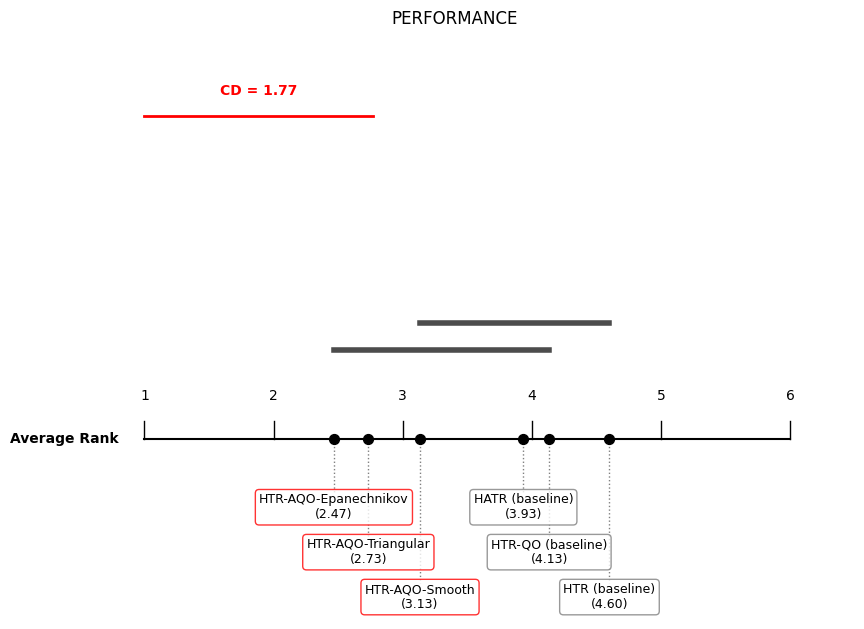

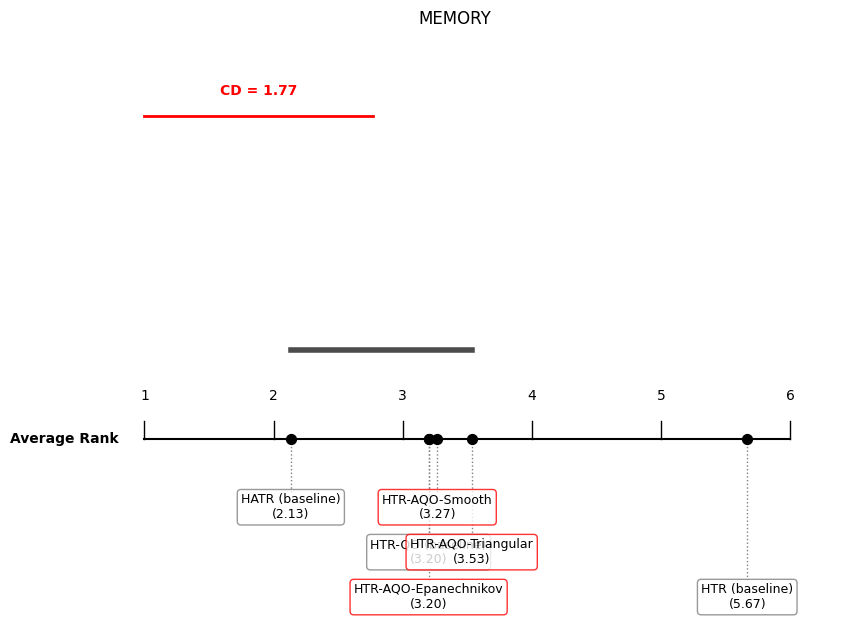

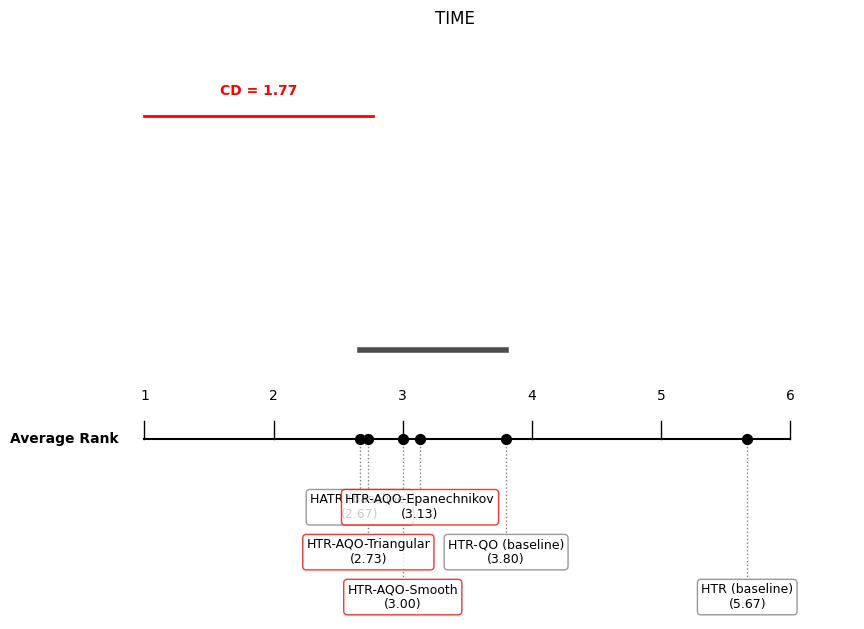

In [16]:
cd = critical_difference_threshold(N_MODELS, N_DATASETS, significance=0.1)
for param in params:
    fig = draw_cd_diagram(results.loc[param], cd, title=param.upper())
    plt.show()